In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


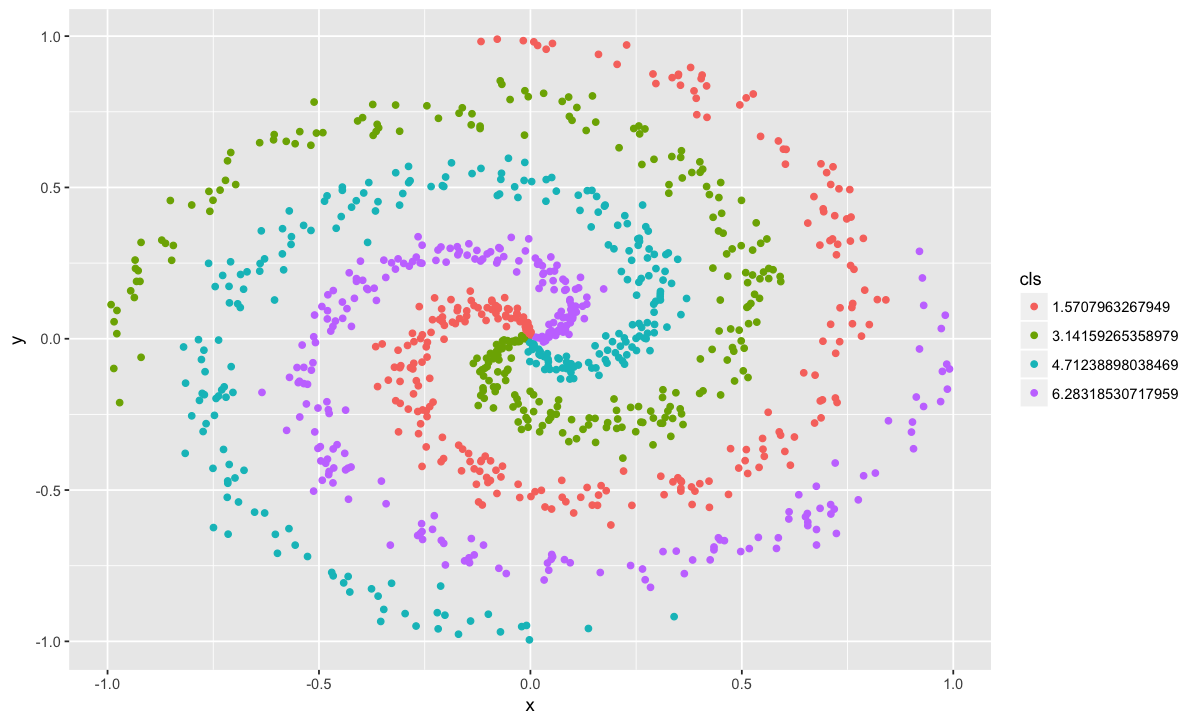

In [3]:
r <- seq(.01, 1, length = 1000)
cls <- rep(pi / 2 * 1:4, 250)
phi <- seq(0, 2 * pi, length = 1000) + rnorm(sd=.24, n = 1000) + cls
df <- tibble(x = r * cos(phi), y = r * sin(phi), cls=factor(cls))
ggplot(df) + geom_point(aes(x, y, color=cls))

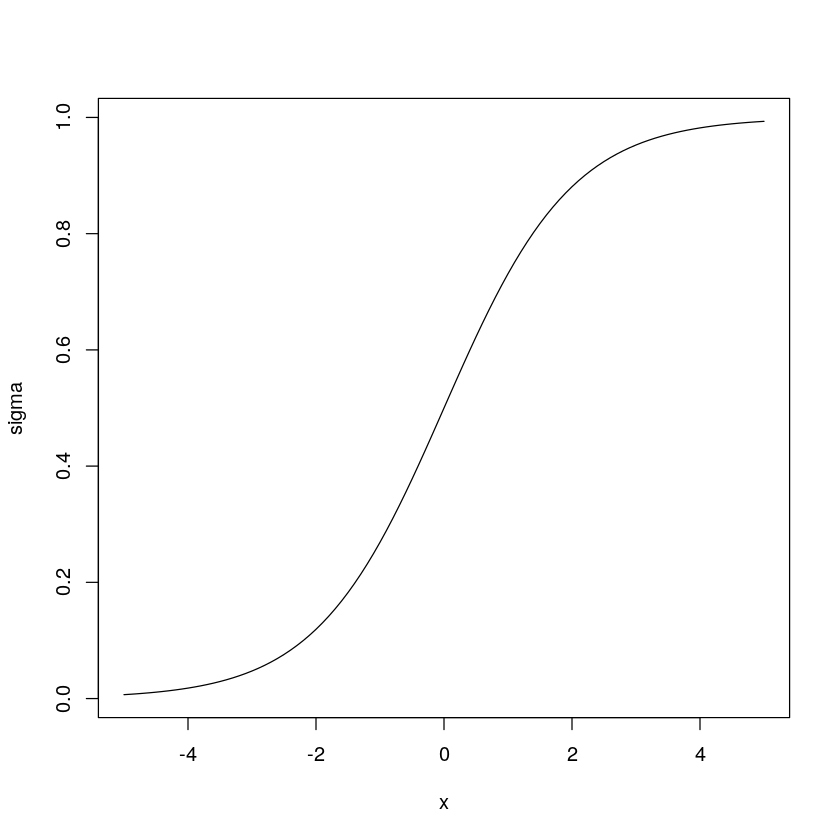

In [9]:
sigma <- plogis
plot(sigma, from=-5, to=5)

In [10]:
library(modelr)
M <- model_matrix(data = df, formula = ~ x + y + cls - 1) %>% print
X <- as.matrix(select(M, x, y))
Y <- as.matrix(select(M, -(x:y)))

# A tibble: 1,000 x 6
          x        y cls1.5707963267… cls3.1415926535… cls4.7123889803…
      <dbl>    <dbl>            <dbl>            <dbl>            <dbl>
 1  0.00143  9.90e-3                1                0                0
 2 -0.0102  -4.13e-3                0                1                0
 3 -0.00537 -1.07e-2                0                0                1
 4  0.0130   6.23e-4                0                0                0
 5 -0.00781  1.16e-2                1                0                0
 6 -0.0149   8.31e-4                0                1                0
 7  0.00110 -1.59e-2                0                0                1
 8  0.0166  -3.52e-3                0                0                0
 9 -0.00363  1.76e-2                1                0                0
10 -0.0150  -1.16e-2                0                1                0
# ... with 990 more rows, and 1 more variable: cls6.28318530717959 <dbl>


In [ ]:
unpack_params <- function(params) {
    W = matrix(params[1:(D * h)], nrow = D)  # D * h
    params = params[-(1:(D * h))]
    b = params[1:h]
    params = params[-(1:h)]
    W2 = matrix(params[1:(h * K)], nrow = h)  # h * K
    params = params[-(1:(h * K))]
    stopifnot(length(params) == K)
    b2 = params
    list(W=W, b=b, W2=W2, b2=b2)
}

nnet_par <- function(params, X, ...) {
    beta <- unpack_params(params)
    nnet(beta$W, beta$b, beta$W2, beta$b2, X, ...)
}

In [17]:
x = rnorm(n=1)
y = rnorm(n=1)
x <- c(x, y) 

output <- vector("double", 10)

A <- matrix(rnorm(n = 2 * 10), ncol = 2)


y <- sigma(A %*% x)

exp(y) / sum(exp(y))


      [,1]      
 [1,] 0.09719645
 [2,] 0.07003111
 [3,] 0.09999212
 [4,] 0.15260581
 [5,] 0.07394461
 [6,] 0.09316061
 [7,] 0.08004148
 [8,] 0.12486554
 [9,] 0.10892782
[10,] 0.09923447

In [79]:
h <- 50  # number of hidden states
D <- ncol(X)  # number of features / predictors
K <- ncol(Y)  # number of classes

nnet <- function(W, b, W2, b2, X, sigma=plogis) {
    # dim(W) = (D, h)
    # dim(b) = h
    hidden_layer <- sigma(X %*% W + b)
    # class score
    # dim(W2) = (h, K)
    # dim(b2) = K
    scores <- hidden_layer %*% W2 + b2
    # probability
    p <- exp(scores)
    p / rowSums(p)  # normalize to probability
}

In [46]:
a = .0001
loss <- function(p) {
    -mean(Y %*% t(log(p)))
}

obj <- function(params) {
    p <- nnet_par(params, X)
    loss(p) + a * sum(params ** 2)
}

In [47]:
params0 <- rnorm(n = D * h + h + h * K + K)
(res <- optim(par = params0, fn = obj))

$par
 [1] -1.27180215  0.42042939 -1.33285857  1.07759974  0.09905015 -0.37943161
 [7] -0.75497550  0.08181778  0.48835072 -1.36291630  0.19784316 -0.02229461
[13]  0.08735895 -1.59107320 -2.16222559 -0.77478461 -0.17580636  1.65157176
[19] -0.45620267  0.30371681 -1.13516722  1.87569580  1.11265592 -0.22393435
[25]  0.49155063 -0.01803946 -0.15232698 -0.39447025 -0.71223410 -1.08994080
[31] -0.93931068  1.09272643  0.47008449 -1.05259758 -1.05988476 -0.26276010
[37]  1.17327138 -1.52835251  0.48193803 -0.19457468  0.96291605 -0.84300711
[43]  0.70060933  0.97321602 -1.22110340  0.94371127 -1.22142783 -1.28128129
[49]  0.19990557  2.13327637  2.48267014  1.78174322 -1.04785954  1.15685771
[55]  0.98122151 -1.34762606 -0.16116281 -0.99541651 -0.37726047  1.11958986
[61]  0.78836465  2.22566906  1.20549277 -1.61046113 -0.66607363  0.25031598
[67] -0.17435255 -0.07045551  0.22898186  1.07165543  0.91220289 -0.16101135
[73]  0.73841736  0.07229290

$value
[1] 1.836323

$counts
function gradient 
      77       NA 

$convergence
[1] 1

$message
NULL

In [80]:
source("neural.R")
ret <- nnet_g(X, Y, step_size = 0.4,reg = 0.0002, h=50, niteration = 5000)

[1] "iteration 0 : loss 1.3862581664429"
[1] "iteration 1000 : loss 0.950634383773728"
[1] "iteration 2000 : loss 0.614064521373868"
[1] "iteration 3000 : loss 0.428659166182451"
[1] "iteration 4000 : loss 0.346097137738223"
[1] "iteration 5000 : loss 0.307086414499625"


In [19]:
# plot the resulting classifierhs <- 0.01
library(modelr)
grid <- data_grid(df, x=seq_range(x, 100), y=seq_range(y, 100)) %>% as.matrix
pred <- nnet(ret$W, ret$b, ret$W2, ret$b2, grid) %>% apply(1, which.max)
ggplot() + geom_tile(aes(x = grid[,1],y = grid[,2], fill=factor(pred)), alpha = 0.3) +   
                     geom_point(data = df, aes(x=x, y=y, color = factor(cls)), size = 2)

ERROR: Error in nnet(ret$W, ret$b, ret$W2, ret$b2, grid): could not find function "nnet"


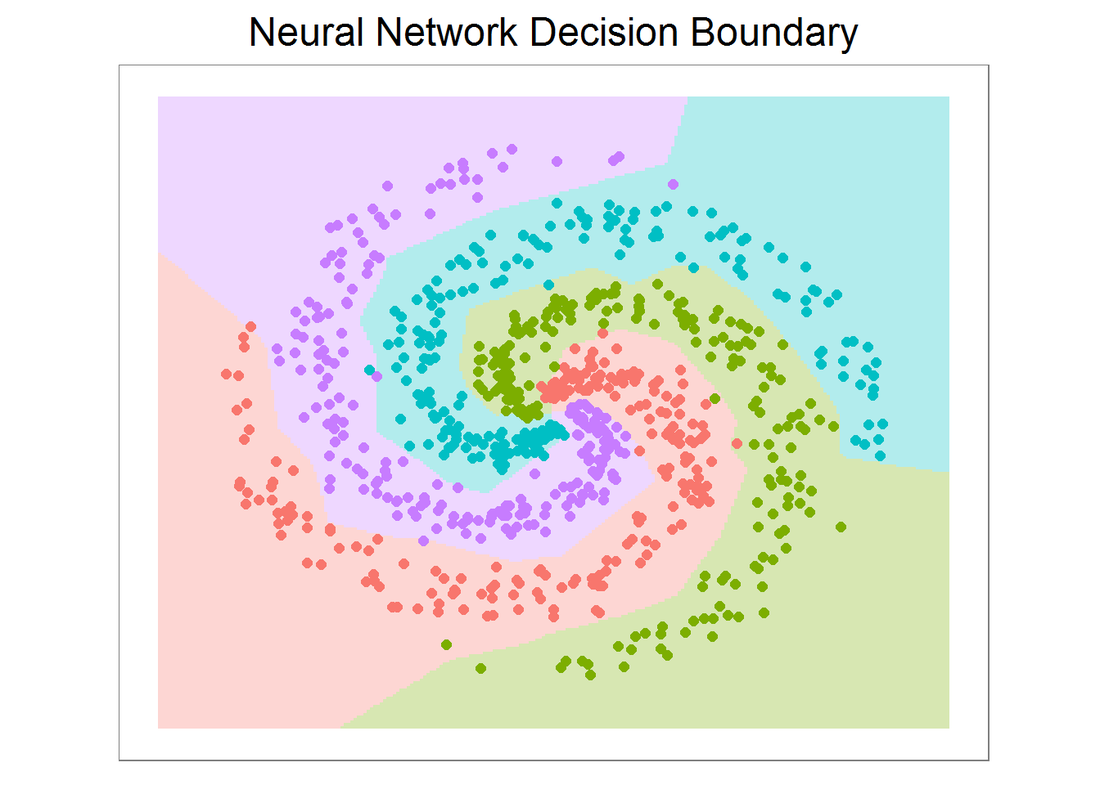